In [1]:
import numpy as np
import os, sys
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from cellProcessing import *
import zarr
import scipy.ndimage.filters as sfilter
from utils import intesity_mask
from fish_proc.utils.snr import local_correlations_fft

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
## STEP 1: specify data and save path
dir_root = '/groups/ahrens/ahrenslab/jing/giving_up/20190219/fish2/7dpf-huc_gcamp7ff_gfap_rgeco-GU_slow_fwd-fish02-exp02_20190219_174013/im'
save_root = '/nrs/ahrens/Ziqiang/Jing_Glia_project/Processed_data/20190219/fish2/7dpf-huc_gcamp7ff_gfap_rgeco-GU_slow_fwd-fish02-exp02_20190219_174013'
if not os.path.exists(save_root):
    os.makedirs(save_root)

In [52]:
from fish_proc.demix import superpixel_analysis as sup
from fish_proc.utils.snr import local_correlations_fft

In [4]:
Y_svd = da.from_zarr(f'{save_root}/masked_local_pca_data.zarr')
mask = da.from_zarr(f'{save_root}/mask_map.zarr')

In [175]:
dt = 3
# rand_block = (8, 1, 1, 0)
rand_block = (8, 7, 4, 0)
M = Y_svd.blocks[rand_block][:, :, :, ::dt].compute()

In [176]:
M = M.squeeze()
M[~mask.blocks[rand_block].squeeze()]=0

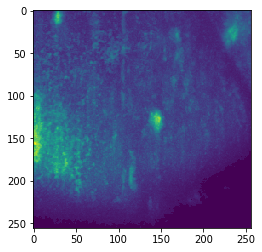

In [177]:
plt.imshow(M.max(axis=-1).squeeze())

In [178]:
Cblock = local_correlations_fft(M, is_mp=False)

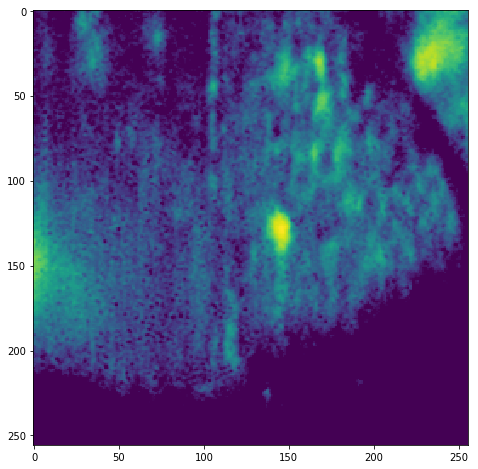

In [179]:
plt.figure(figsize=(8,8))
plt.imshow(Cblock, vmin=0.70)
plt.show()

In [180]:
cut_off_point = [0.95, 0.9, 0.85, 0.70]
rlt_= sup.demix_whole_data(M, cut_off_point[pass_num_max-pass_num:], length_cut=[20, 20, 40, 40],
                           th=[1,1,1,1], pass_num=pass_num, residual_cut = [0.6,0.6,0.6,0.6],
                           corr_th_fix=0.3, max_allow_neuron_size=0.05, merge_corr_thr=0.90,
                           merge_overlap_thr=0.6, num_plane=1, patch_size=[10, 10], plot_en=False,
                           TF=False, fudge_factor=1, text=False, bg=False, max_iter=50,
                           max_iter_fin=90, update_after=40) 

start 1 pass!
Get threshould data.....
find superpixels!
RAM used 2.6610 GB
RAM used 2.6610 GB
clear_variables: memory before: 2.661022186279297, after: 2.661022186279297, consumed: 0.0; exec time: 00:00:00
Start with finding superpixels.....
Get components.....
time: 7.446023941040039
rank 1 svd!
# of superpixels: 37
time: 9.454597473144531
find pure superpixels!
time: 0.05527663230895996
prepare iteration!
1.007751703262329
time: 6.0192954540252686
start 1 pass iteration!
start update_AC_l2_Y....
time: 3.167527437210083
time: 2.911421537399292
time: 2.8967702388763428
time: 2.9377920627593994
time: 3.0268006324768066
time: 2.8515398502349854
time: 2.939387083053589
time: 2.8611509799957275
time: 3.013697862625122
time: 2.8365790843963623
time: 2.886986494064331
time: 2.8177788257598877
time: 2.888362169265747
time: 3.0848236083984375
time: 2.9373340606689453
time: 2.8060379028320312
time: 3.0477724075317383
time: 2.762437343597412
time: 2.8829641342163086
time: 3.1339271068573
time: 

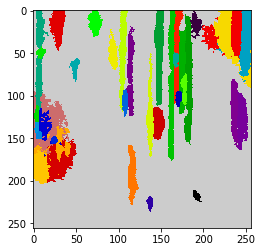

In [181]:
A_ = rlt_['fin_rlt']['a']
A_comp = np.zeros(A_.shape[0])
A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
plt.imshow(A_comp.reshape(256, 256).T, cmap=plt.cm.nipy_spectral_r, alpha=1.0)

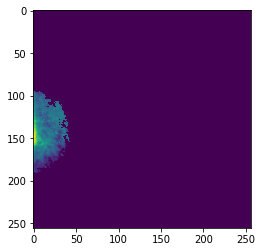

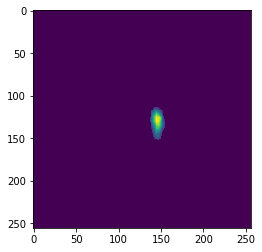

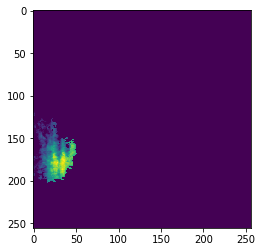

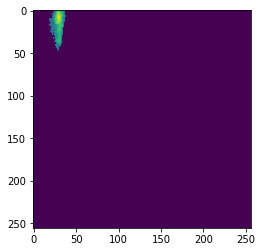

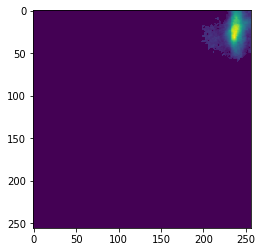

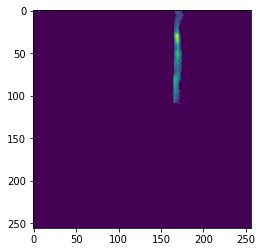

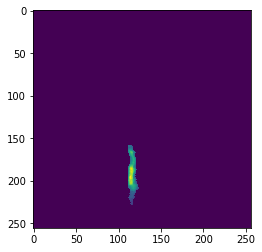

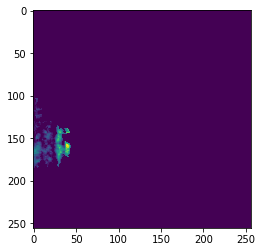

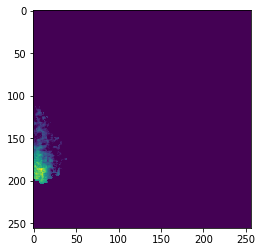

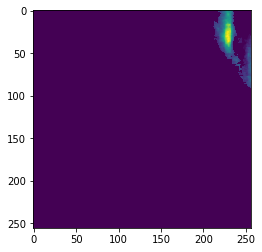

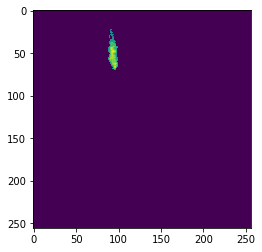

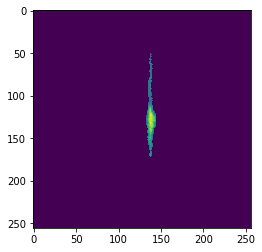

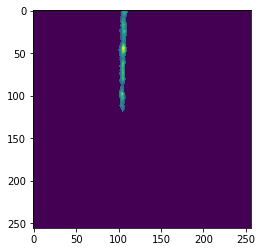

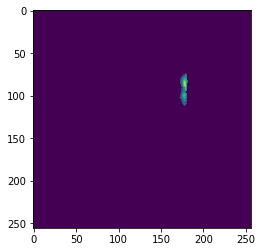

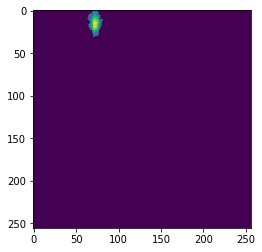

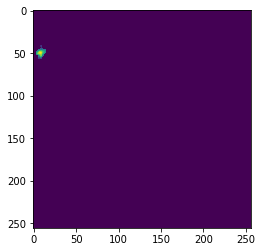

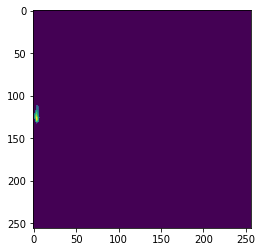

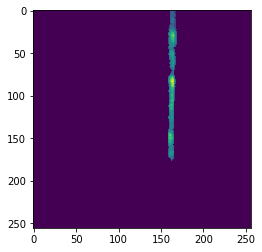

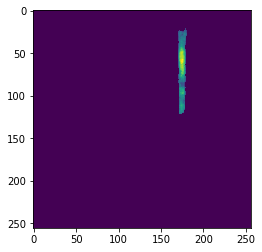

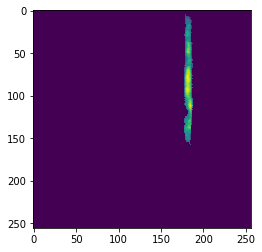

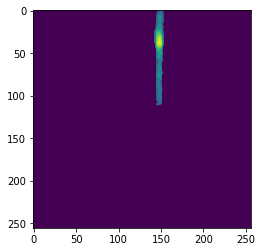

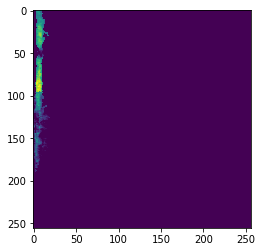

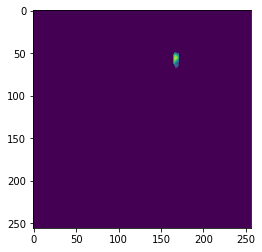

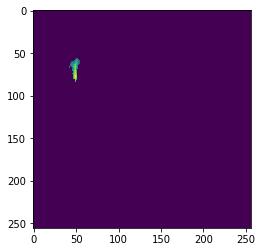

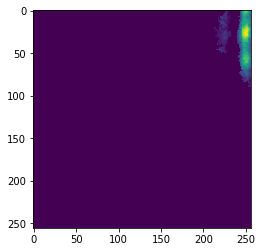

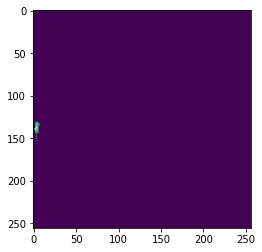

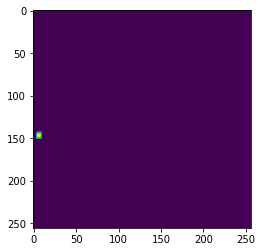

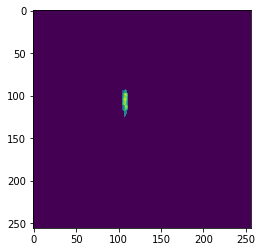

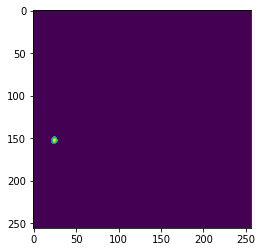

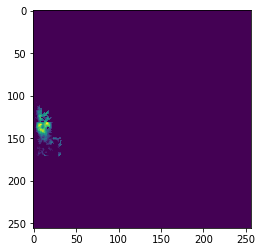

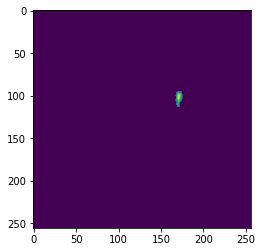

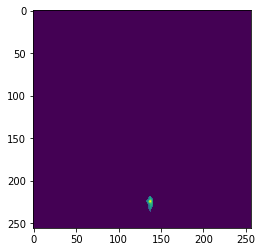

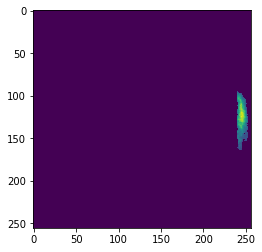

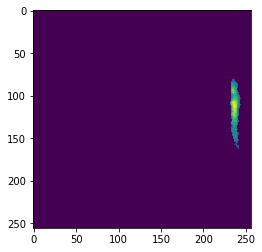

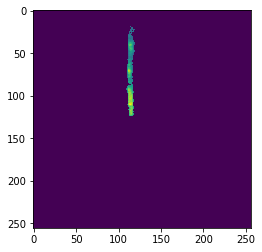

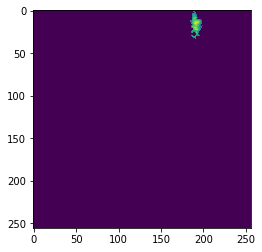

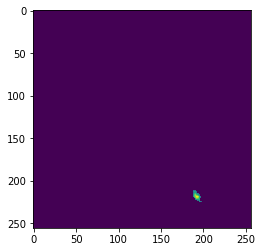

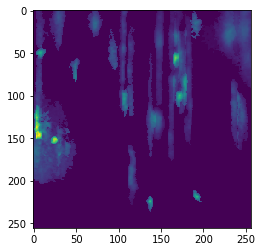

In [182]:
for n in range(A_.shape[-1]):
    plt.imshow(A_[:, n].reshape(256, 256).T)
    plt.show()

plt.imshow(A_.sum(axis=-1).reshape(256, 256).T)
plt.show()

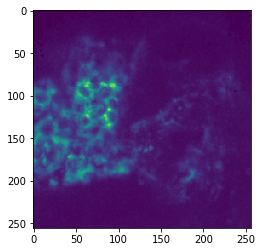

start 1 pass!
Get threshould data.....
find superpixels!
RAM used 2.5488 GB
RAM used 2.5488 GB
clear_variables: memory before: 2.5488204956054688, after: 2.5488204956054688, consumed: 0.0; exec time: 00:00:00
Start with finding superpixels.....
Get components.....
time: 6.4790990352630615
rank 1 svd!
# of superpixels: 298
time: 10.251926898956299
find pure superpixels!
time: 0.15647101402282715
prepare iteration!
0.9705791473388672
time: 6.211324691772461
start 1 pass iteration!
start update_AC_l2_Y....
time: 3.9819211959838867
time: 3.5323703289031982
time: 3.4330356121063232
time: 3.4676060676574707
time: 3.536928653717041
time: 3.4256672859191895
time: 3.4929659366607666
time: 3.4205868244171143
time: 3.435756206512451
time: 3.2874906063079834
time: 3.4019761085510254
time: 3.3916380405426025
time: 3.4164137840270996
time: 3.4001049995422363
time: 3.427577257156372
time: 3.4781665802001953
time: 3.4132602214813232
time: 3.419466972351074
time: 3.3717260360717773
time: 3.401092290878

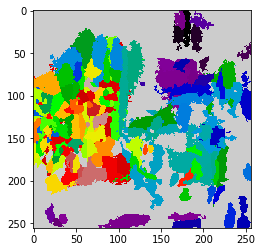

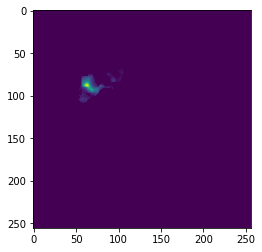

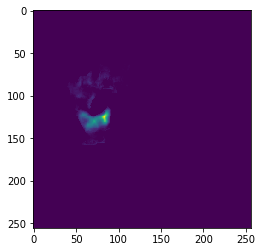

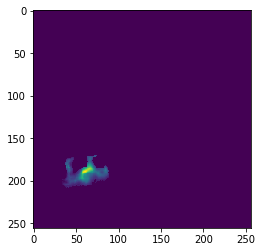

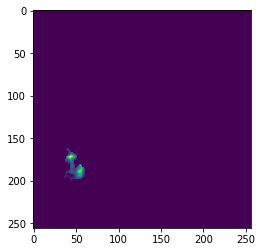

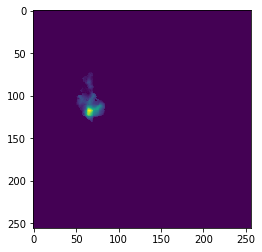

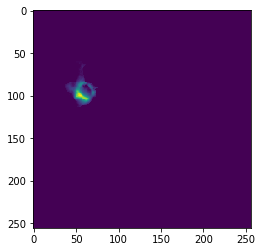

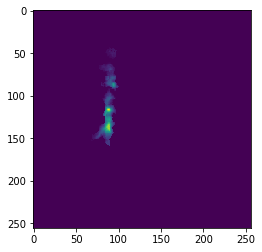

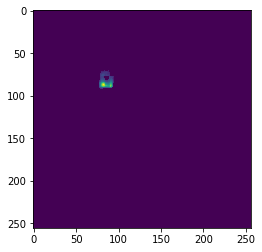

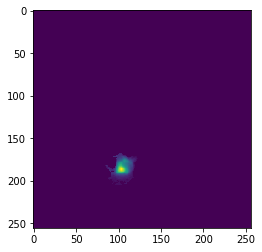

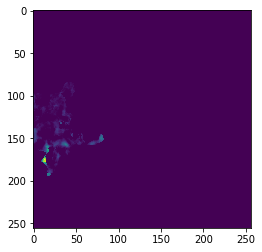

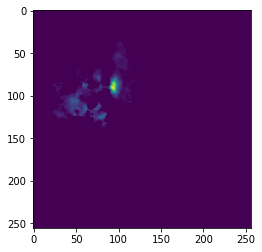

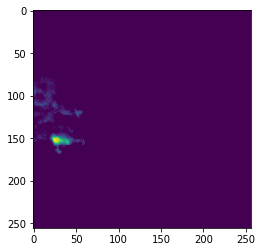

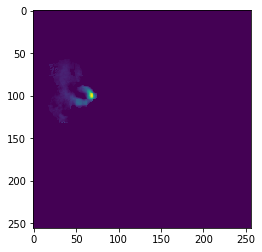

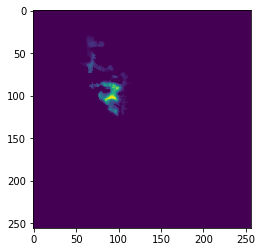

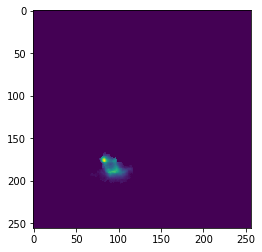

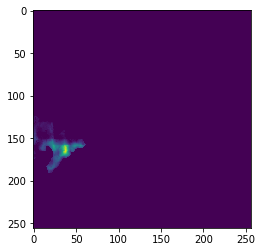

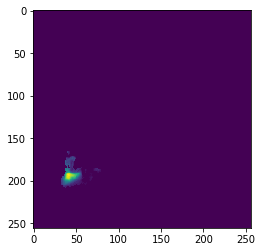

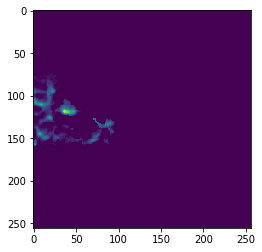

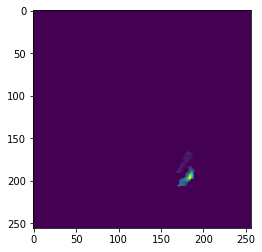

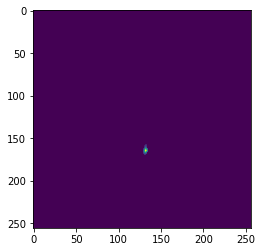

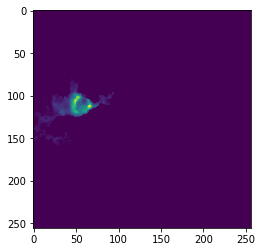

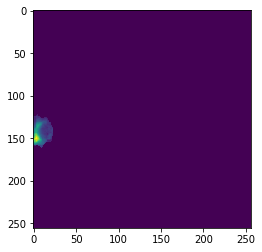

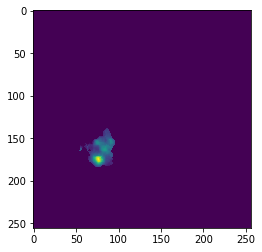

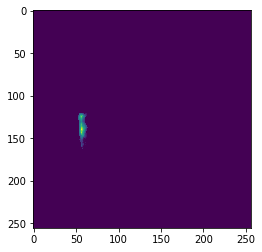

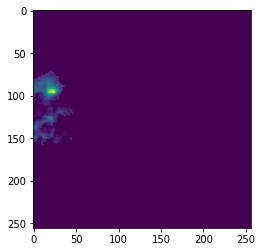

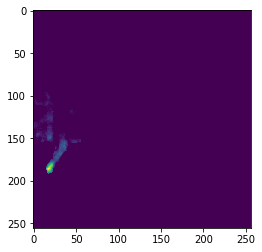

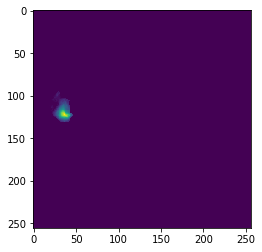

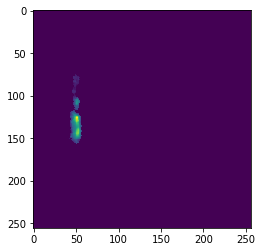

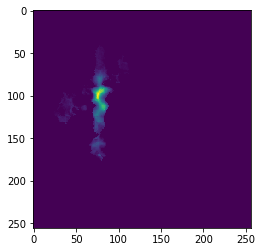

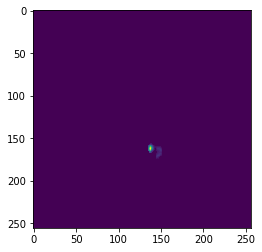

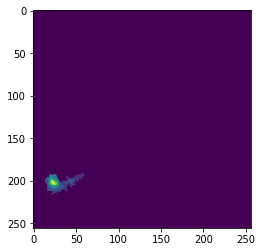

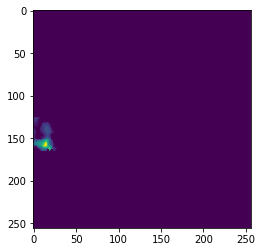

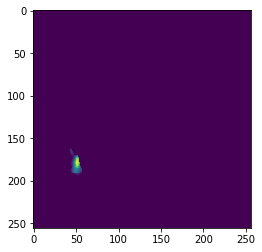

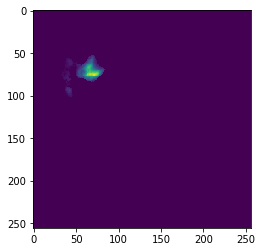

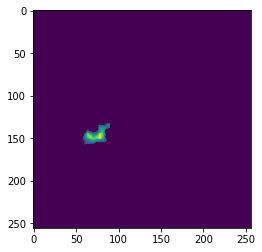

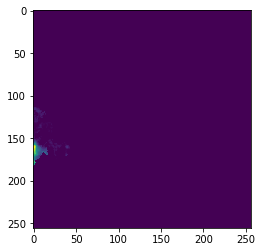

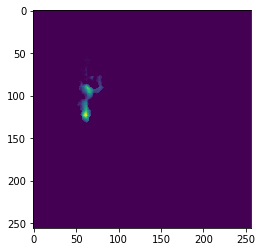

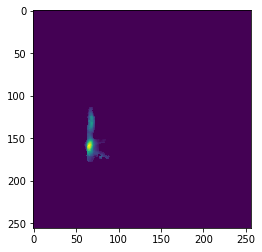

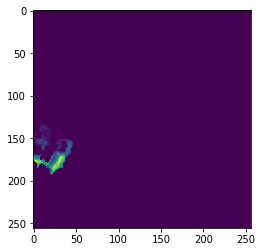

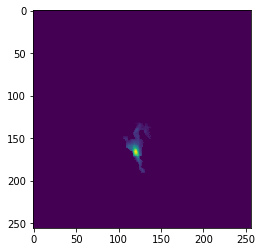

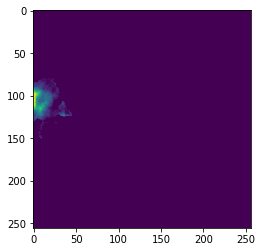

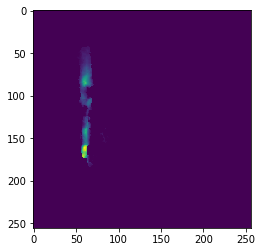

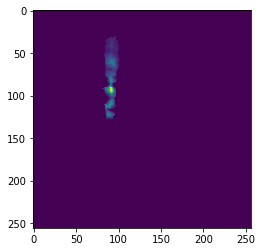

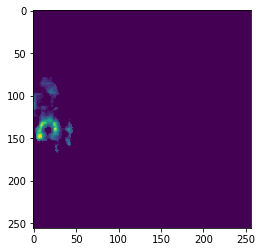

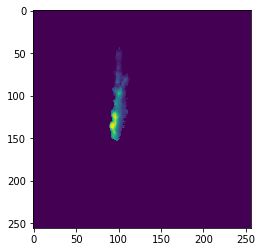

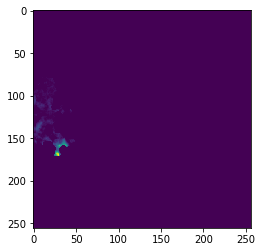

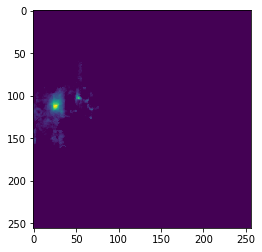

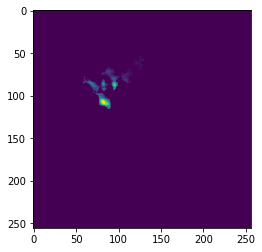

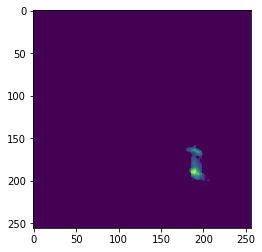

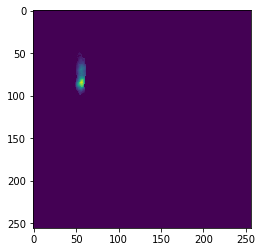

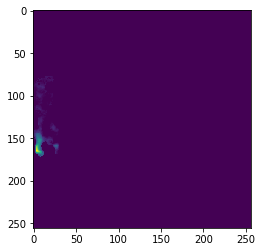

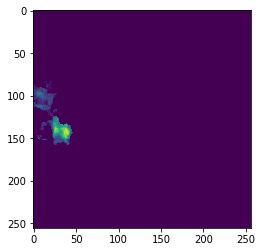

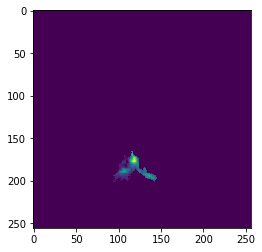

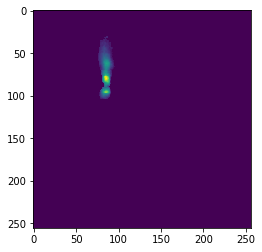

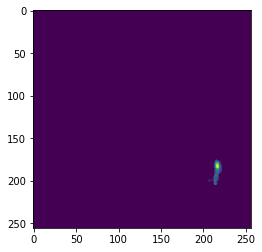

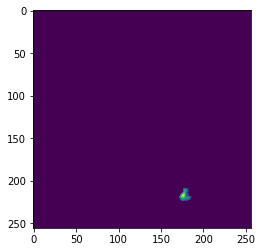

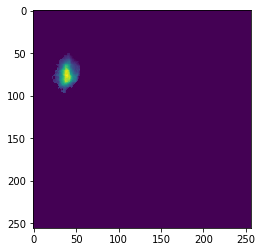

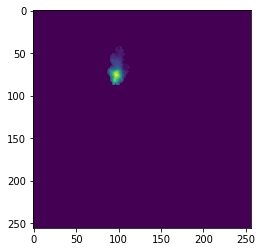

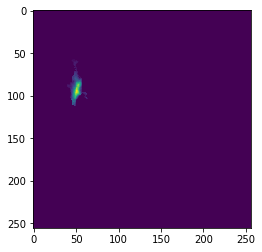

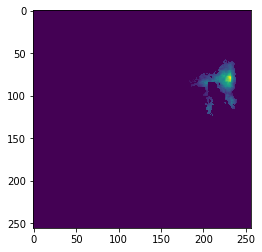

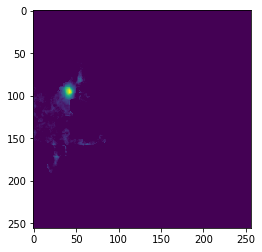

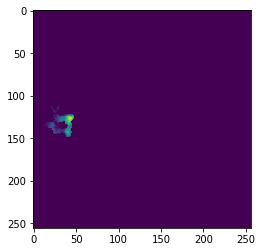

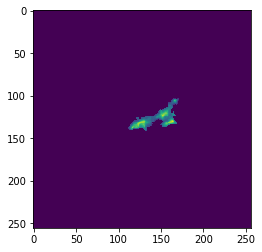

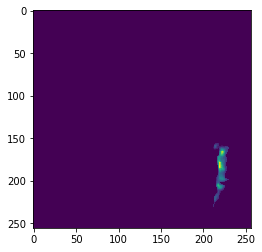

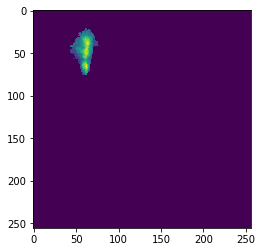

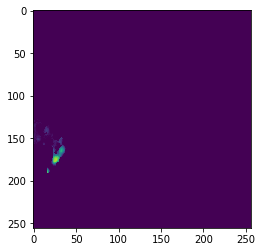

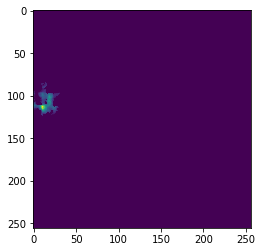

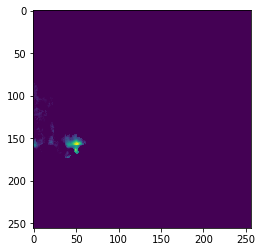

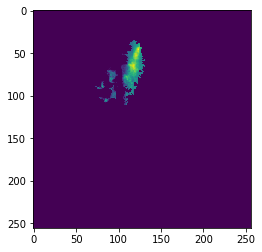

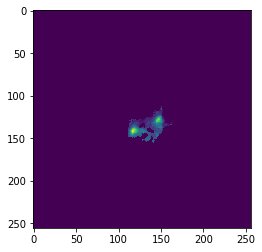

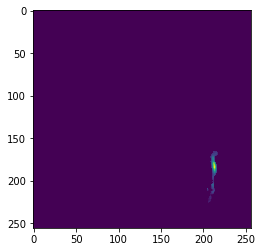

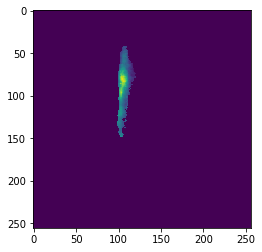

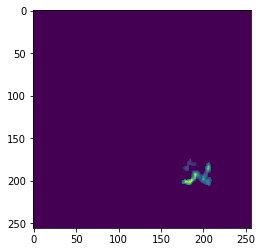

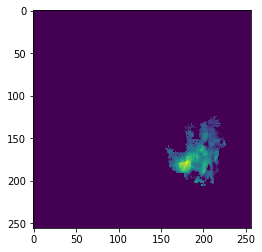

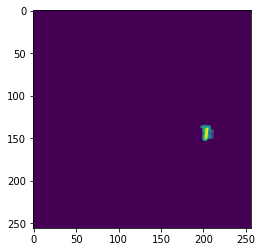

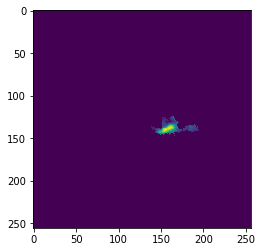

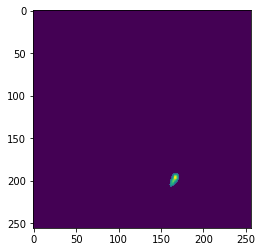

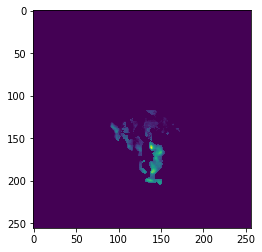

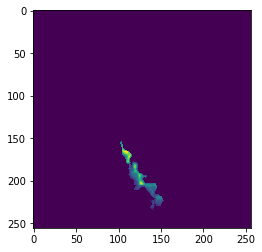

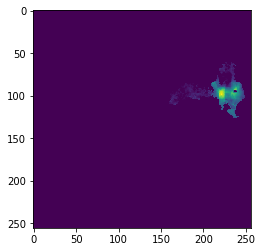

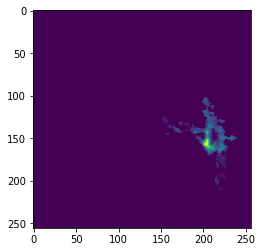

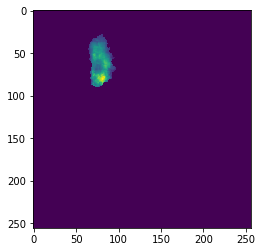

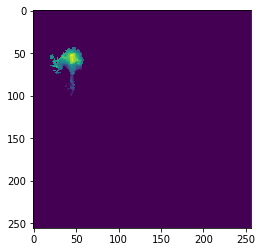

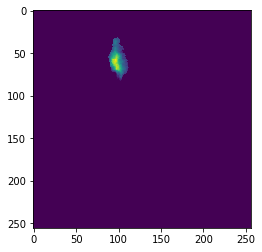

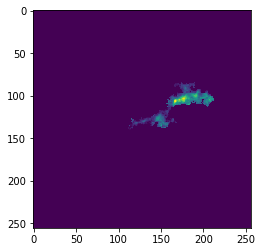

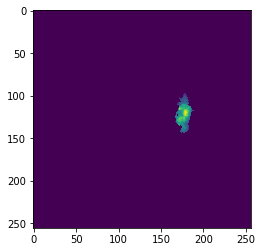

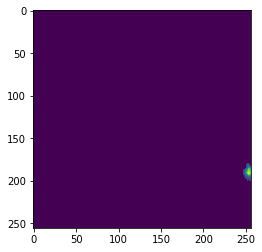

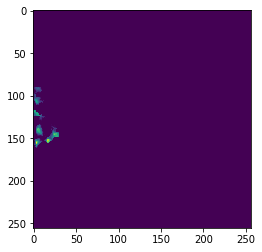

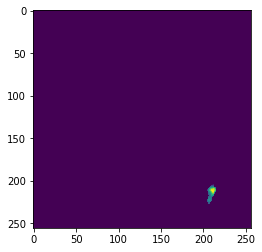

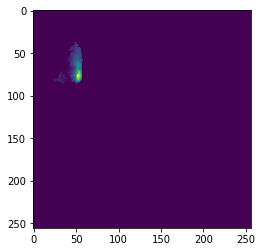

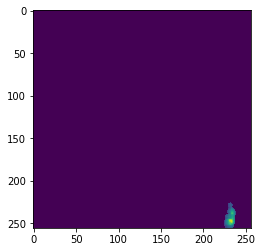

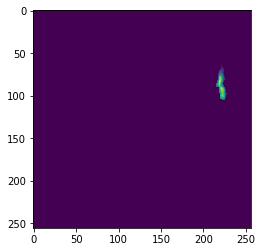

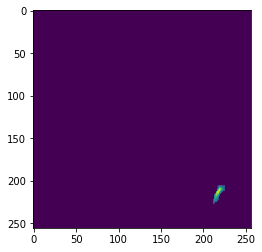

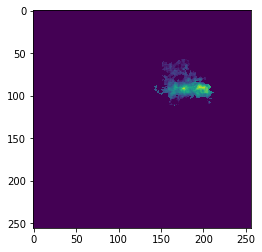

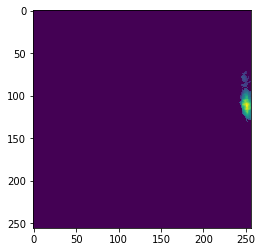

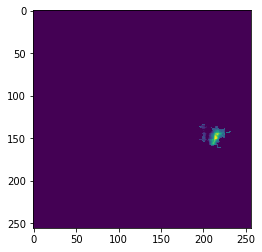

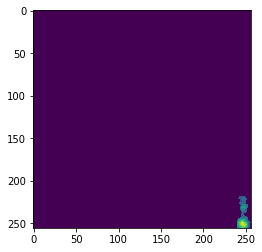

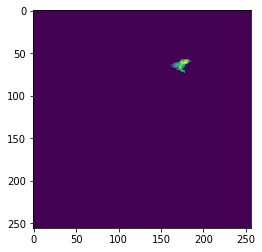

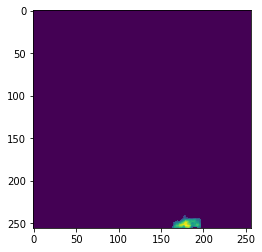

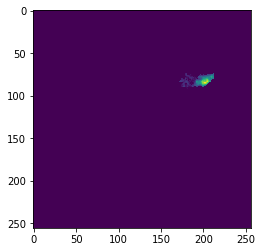

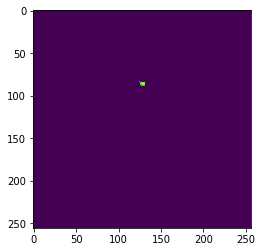

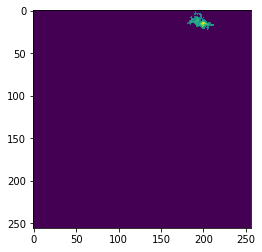

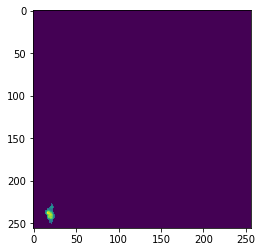

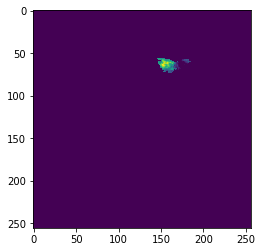

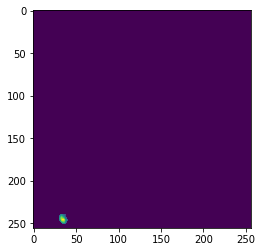

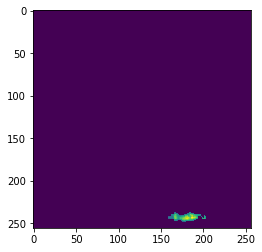

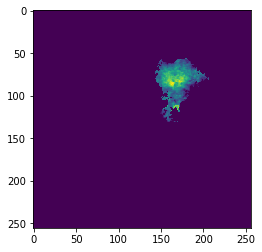

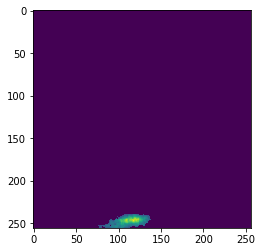

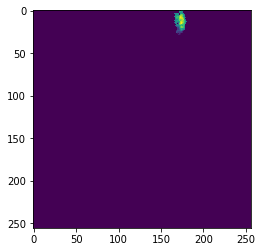

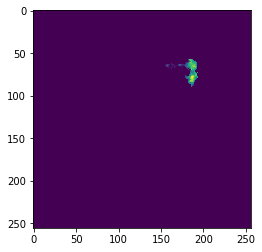

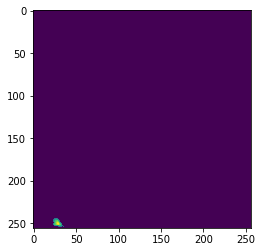

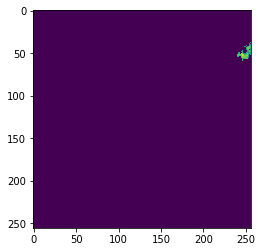

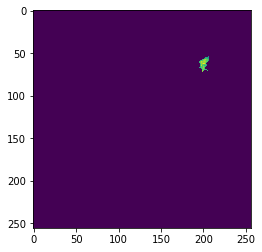

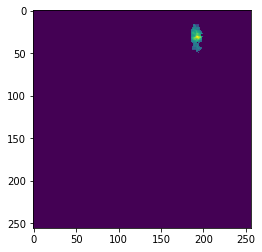

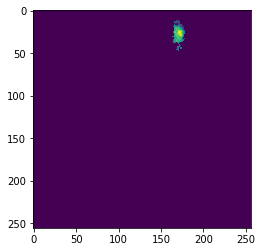

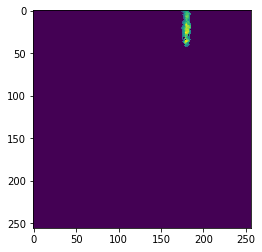

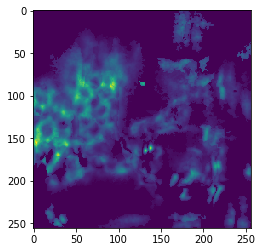

In [184]:
dt = 3
rand_block = (8, 1, 1, 0)
M = Y_svd.blocks[rand_block][:, :, :, ::dt].compute()

M = M.squeeze()
M[~mask.blocks[rand_block].squeeze()]=0

plt.imshow(M.max(axis=-1).squeeze())
plt.show()

cut_off_point = [0.95, 0.9, 0.85, 0.70]
rlt_= sup.demix_whole_data(M, cut_off_point[pass_num_max-pass_num:], length_cut=[20, 20, 40, 40],
                           th=[1,1,1,1], pass_num=pass_num, residual_cut = [0.6,0.6,0.6,0.6],
                           corr_th_fix=0.3, max_allow_neuron_size=0.05, merge_corr_thr=0.90,
                           merge_overlap_thr=0.6, num_plane=1, patch_size=[10, 10], plot_en=False,
                           TF=False, fudge_factor=1, text=False, bg=False, max_iter=50,
                           max_iter_fin=90, update_after=40) 

A_ = rlt_['fin_rlt']['a']
A_comp = np.zeros(A_.shape[0])
A_comp[A_.sum(axis=-1)>0] = np.argmax(A_[A_.sum(axis=-1)>0, :], axis=-1) + 1
plt.imshow(A_comp.reshape(256, 256).T, cmap=plt.cm.nipy_spectral_r, alpha=1.0)
plt.show()

for n in range(A_.shape[-1]):
    plt.imshow(A_[:, n].reshape(256, 256).T)
    plt.show()

plt.imshow(A_.sum(axis=-1).reshape(256, 256).T)
plt.show()